In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = pd.read_csv('/home/abin/Desktop/boston_housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### The predictor variable is 'RM' and the target variable is ''MEDV'

In [3]:
mean_val = boston['MEDV'].mean()
mean_val

22.532806324110698

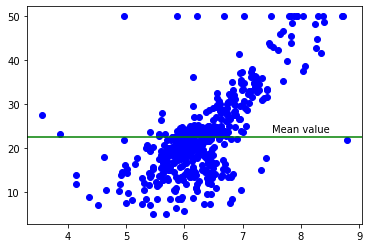

In [15]:
x = boston['RM']
y = boston['MEDV']
plt.scatter(x, y, color = 'b')
plt.axhline(y = mean_val, color = 'g')
plt.annotate("Mean value", xy = (7.5, mean_val + 1))
plt.show()

# Here we'll start to make new DataFrames to cook our best fit model

In [19]:
boston_mean = pd.DataFrame(np.array([boston['RM'], boston['MEDV'], mean_val - boston['MEDV']]).T,
                           columns = ['RM', 'MEDV', 'Mean_error'])
boston_mean

,RM,MEDV,Mean_error
0,6.575,24.0,-1.467194
1,6.421,21.6,0.932806
2,7.185,34.7,-12.167194
3,6.998,33.4,-10.867194
4,7.147,36.2,-13.667194
...,...,...,...
501,6.593,22.4,0.132806
502,6.120,20.6,1.932806
503,6.976,23.9,-1.367194
504,6.794,22.0,0.532806


### Sum of Squared Mean Errors (MSE):

In [20]:
print(sum(boston_mean['Mean_error']**2))

42716.29541501979


In [22]:
xiyi = x*y
xmean = x.mean()
ymean = y.mean()
numerator = xiyi.sum() - len(boston)*xmean*ymean
denominator = (x**2).sum() - len(boston)*(xmean**2)

b1 = numerator/denominator
b0 = ymean - b1*xmean
print(b0, b1)

-34.67062077644796 9.102108981181797


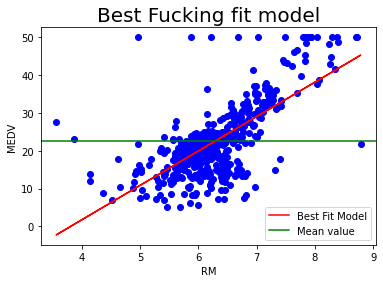

In [27]:
best_fit = b0 + b1*boston['RM']

# visualizing the plot
plt.scatter(x, y, color = 'b')
plt.plot(x, best_fit, color = 'r', label = 'Best Fit Model')
plt.axhline(y = mean_val, color = 'g', label = 'Mean value')
#plt.annotate("Mean value", xy = (7.5, mean_val + 1))
plt.legend(loc = 'lower right')
plt.title('Best Fucking fit model', fontsize = 20)
plt.xlabel('RM', fontsize = 10)
plt.ylabel('MEDV', fontsize = 10)
plt.show()